In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
plt.rc("font",family="Arial")

In [4]:
os.chdir(r"E:\20221011_figs\20221219_module_count")

In [28]:
df = pd.read_excel("module_projection_data.xlsx",index_col=0)

In [31]:
listarea = df.columns.to_list()[1:]

In [32]:
dfdata = df.pivot_table(index= "cluster",values=df.columns.to_list()[1:],aggfunc="mean")

In [33]:
dfdata

,ADP,AHN,AM,ARH,AV,AVP,AVPV,DMH,DMX,IC,...,SCm,SMT,SOC,SUM,TMv,TU,VLPO,VMH,VTA,XII
cluster,,,,,,,,,,,,,,,,,,,,,
1,191.495876,645.758288,8.163996,333.948024,0.837788,91.969443,193.645954,2183.962136,402.515601,40.462508,...,98.998837,6.511246,233.622008,156.819541,128.168706,877.341221,52.015345,226.273662,309.661969,258.891912
2,398.325719,1045.087709,89.466589,145.423932,20.175979,784.143488,538.343353,723.687349,20.493619,17.050643,...,207.193698,32.424925,14.915177,681.149728,247.150645,1489.549021,274.515308,274.606062,706.387622,18.019896
3,46.705517,458.119490,84.961063,77.025356,29.242264,122.127188,98.749867,450.301617,49.002462,131.048513,...,1603.830969,109.959750,107.870462,298.449041,46.012001,433.321901,65.867485,206.810871,788.508731,55.535944
4,87.055152,1320.678911,573.537002,153.261226,183.208503,166.854040,95.705682,312.460320,34.221776,109.663055,...,1252.775915,117.310975,45.357174,481.440705,103.681844,794.461937,84.646430,287.398020,271.572751,57.594839
5,140.869870,3999.432656,40.063753,455.721436,10.792726,173.242873,135.958980,995.095766,32.934742,274.945352,...,3434.592357,17.829758,29.586602,231.913859,149.285739,1643.079033,87.668346,3963.018245,104.976087,37.409617
6,298.483391,1502.981872,25.198044,1072.358509,12.547708,148.568792,295.533636,754.749946,28.824909,56.345019,...,365.674796,10.719126,19.354926,290.355714,566.669440,2550.474244,92.159917,786.186233,168.601879,19.677137


In [34]:
dfdata.loc["sum",:] =dfdata.apply(lambda x:x.sum(),axis =0)
df2 = dfdata.stack().unstack(0)
df3 = df2.div(df2["sum"],axis=0)*100
df4 = df3.drop(["sum"],axis=1).stack().unstack(0)
dfplot = df4[listarea]

In [39]:
dfplot

,MDRNd,MY,SOC,DMX,NTS,XII,IRN,PVH,NLL,PARN,...,PeF,SBPV,ARH,PVp,MPN,PMv,TMv,ME,PVpo,PD
cluster,,,,,,,,,,,,,,,,,,,,,
1,48.745711,44.377951,51.834639,70.866283,60.487808,57.900899,36.383833,28.763652,52.808722,32.252482,...,9.499215,19.752019,14.923461,16.841458,9.481323,16.266046,10.328120,19.075536,27.945020,7.635143
2,2.466903,8.465140,3.309289,3.608075,3.061608,4.030130,4.099344,11.555528,0.580259,3.398085,...,15.949253,9.981409,6.498701,6.390123,16.238699,11.802325,19.915950,1.994684,11.001561,15.709925
3,29.532309,26.425114,23.933646,8.627299,17.042565,12.420554,44.129206,6.712698,18.689979,48.016197,...,12.659323,5.237389,3.442107,1.915249,2.761242,3.370544,3.707750,3.186323,3.624128,1.887389
4,11.880912,10.358675,10.063575,6.025034,6.711157,12.881024,7.747059,8.612622,12.504665,6.354898,...,30.834159,7.543106,6.848934,4.105392,5.592176,6.789843,8.354914,24.559519,4.811947,4.722327
5,4.989499,4.977778,6.564496,5.798440,5.962223,8.366621,5.006300,16.512069,10.031985,5.240366,...,22.923989,28.708328,20.365268,10.096652,16.230978,15.804315,12.029778,3.430401,15.214381,11.494497
6,2.384666,5.395341,4.294354,5.074870,6.734640,4.400771,2.634258,27.843431,5.384389,4.737973,...,8.134061,28.777749,47.921530,60.651126,49.695582,45.966927,45.663488,47.753537,37.402963,58.550720


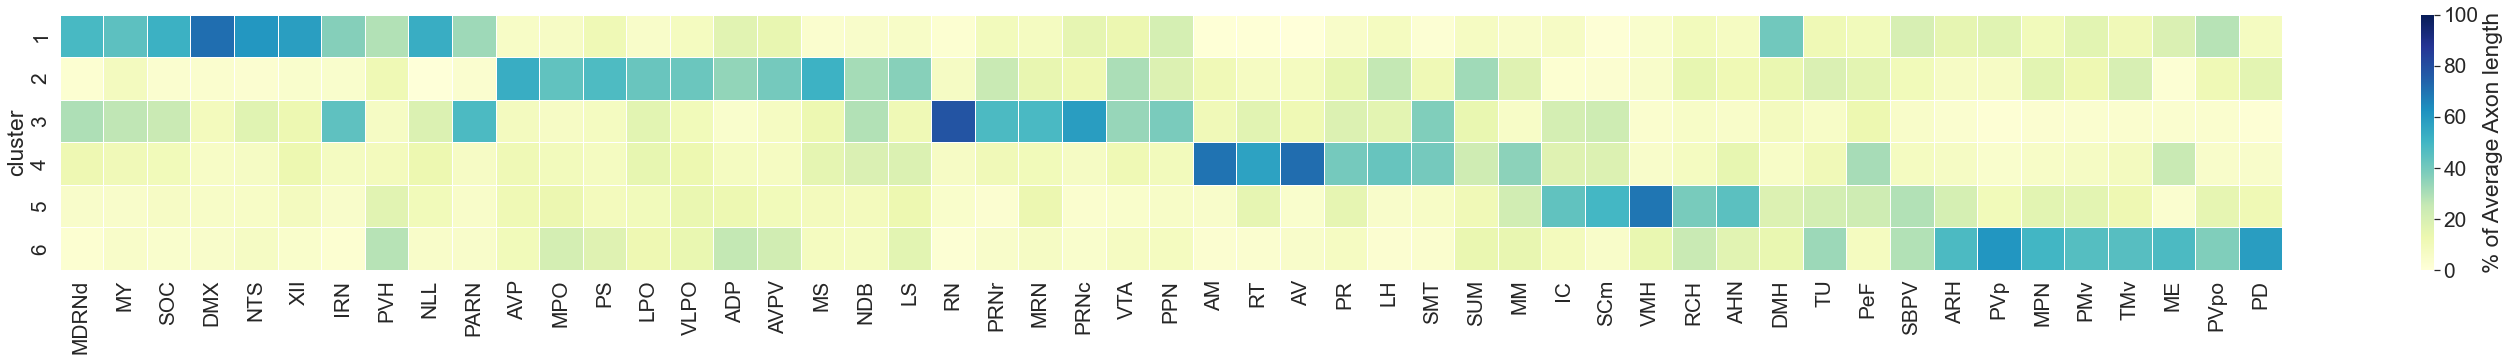

In [43]:
fig, ax = plt.subplots(figsize = (40,5.5))
sns.set(font_scale=1.9)
sns.heatmap(data = dfplot,cmap="YlGnBu",vmin=0,
                 vmax=100,linewidths=1, linecolor='white',annot=False,
                 cbar=True, cbar_kws={"label": "% of Average Axon length"})

plt.tight_layout()
plt.savefig("heatmap_for_module_%_of_Axon_length.pdf",dpi =600,format="pdf")
plt.savefig("heatmap_fo_module_%_of_Axon_length.jpg",dpi =600,format="jpg")